# Curso - Data Visualization: criação de gráficos com o Matplotlib

### Aula 04

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dados/iris.csv')

In [3]:
df.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sépala  150 non-null    float64
 1   largura_sépala      150 non-null    float64
 2   comprimento_pétala  150 non-null    float64
 3   largura_pétala      150 non-null    float64
 4   espécie             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


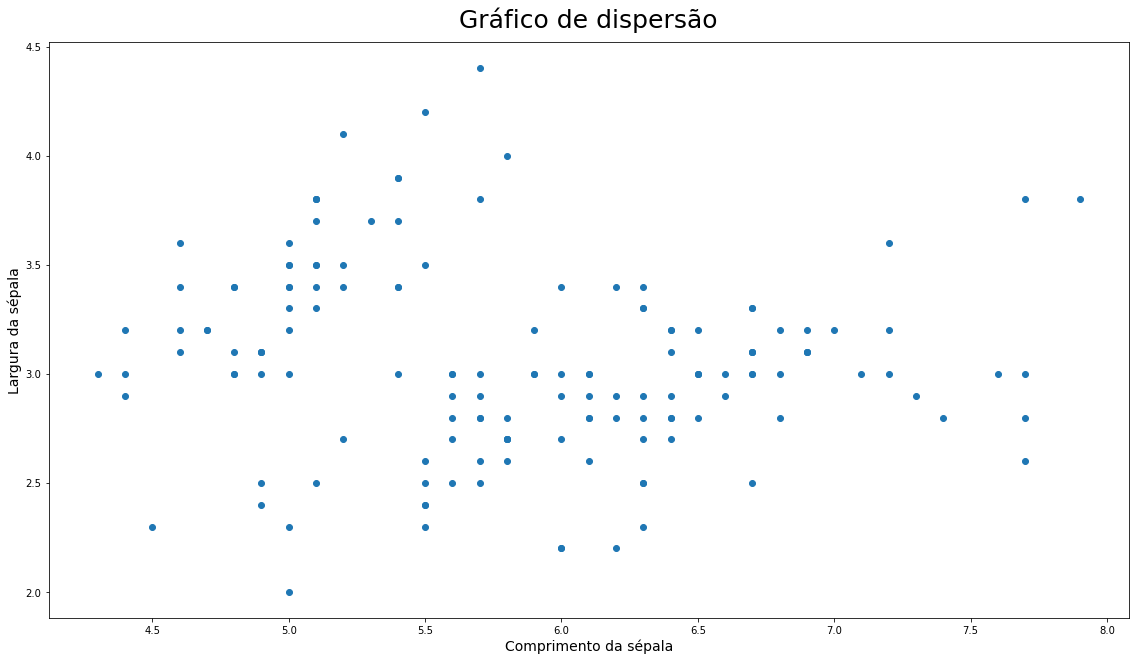

In [5]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])

ax.scatter(df['comprimento_sépala'], df['largura_sépala'])
ax.set_title('Gráfico de dispersão', fontsize=25, pad=15)
ax.set_xlabel('Comprimento da sépala', fontsize=14)
ax.set_ylabel('Largura da sépala', fontsize=14)
plt.show()

In [6]:
df['espécie'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

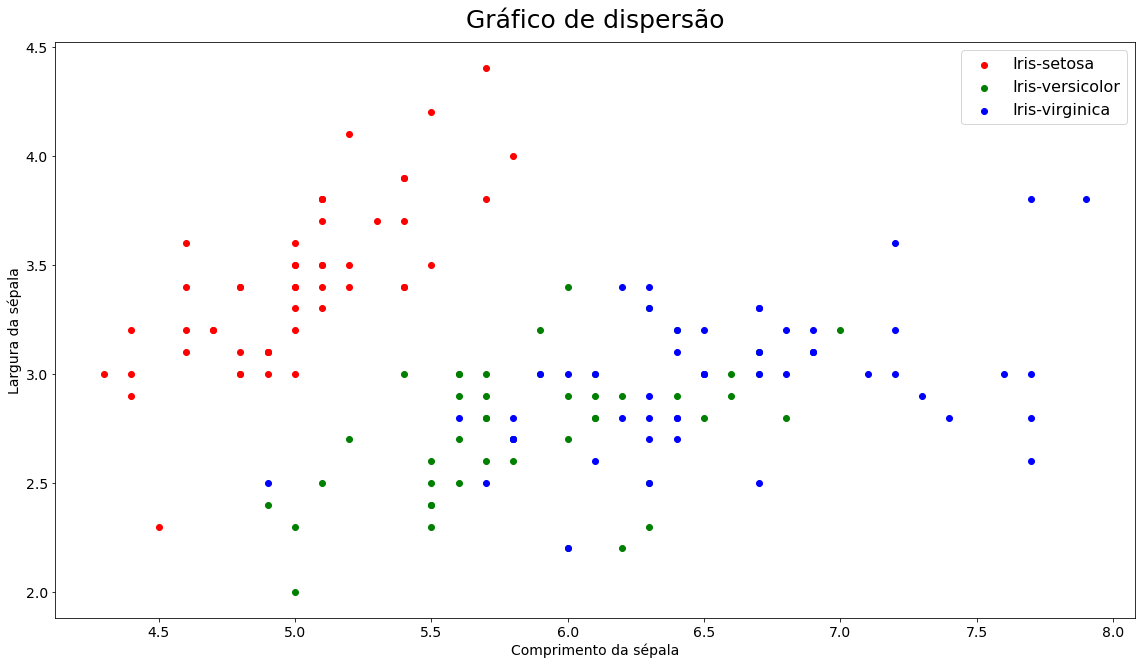

In [7]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])

cores = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

for especie in df['espécie'].unique():
    tmp = df[df['espécie'] == especie]
    ax.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'], color=cores[especie])

ax.set_title('Gráfico de dispersão', fontsize=25, pad=15)
ax.set_xlabel('Comprimento da sépala', fontsize=14)
ax.set_ylabel('Largura da sépala', fontsize=14)
ax.tick_params(labelsize=14)
ax.legend(cores, fontsize=16)
plt.show()

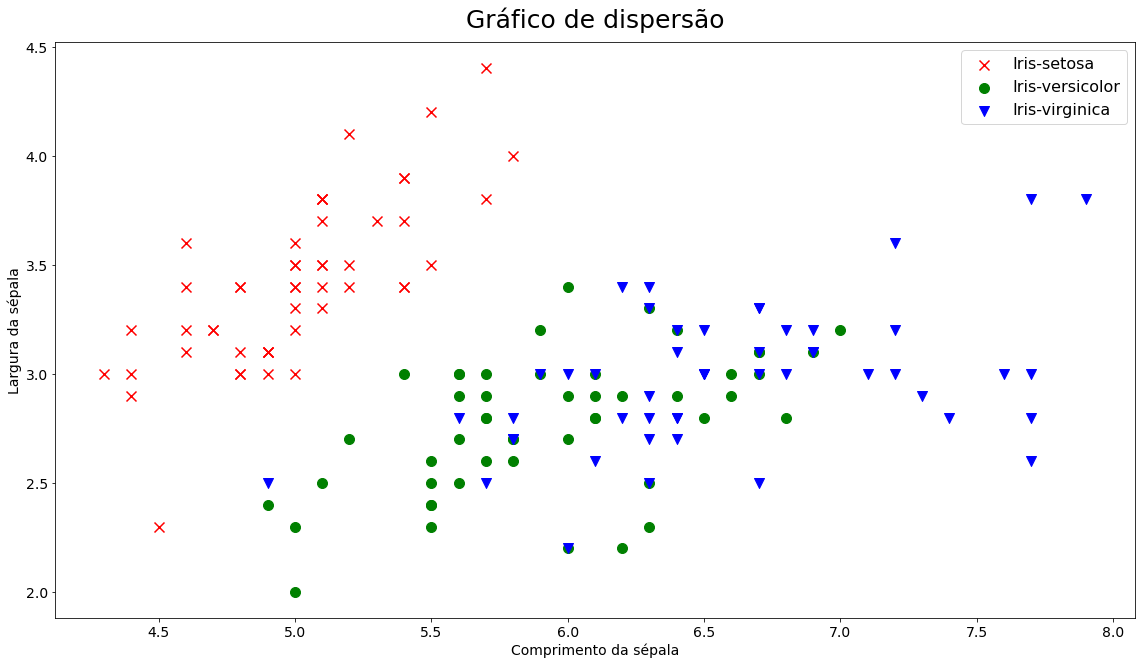

In [8]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])

cores = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
marcadores = {'Iris-setosa': 'x', 'Iris-versicolor': 'o', 'Iris-virginica': 'v'}


for especie in df['espécie'].unique():
    tmp = df[df['espécie'] == especie]
    ax.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'], color=cores[especie], marker=marcadores[especie], 
               s=100)

ax.set_title('Gráfico de dispersão', fontsize=25, pad=15)
ax.set_xlabel('Comprimento da sépala', fontsize=14)
ax.set_ylabel('Largura da sépala', fontsize=14)
ax.tick_params(labelsize=14)
ax.legend(cores, fontsize=16)
plt.show()

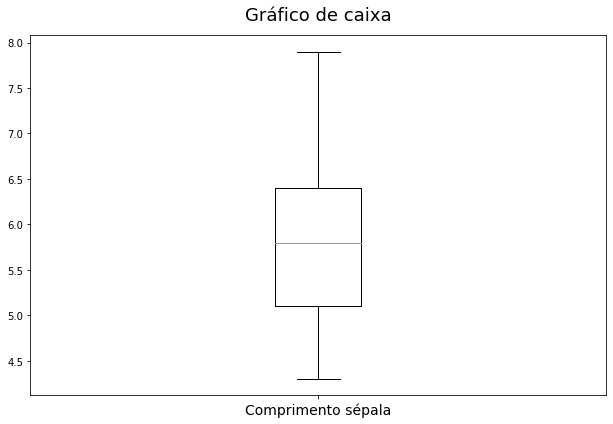

In [9]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])

ax.boxplot(df['comprimento_sépala'])
ax.set_title('Gráfico de caixa', fontsize=18, pad=15)
ax.set_xticklabels(['Comprimento sépala'], fontsize=14)
plt.show()

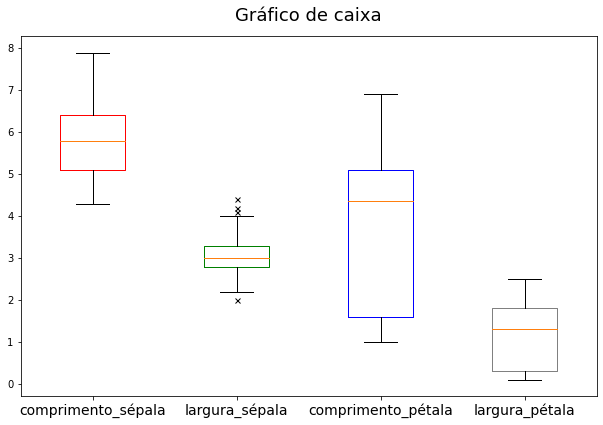

In [10]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])

cores = ['r', 'g', 'b', 'grey']

caixas = ax.boxplot(df.drop('espécie', axis=1).values)
ax.set_title('Gráfico de caixa', fontsize=18, pad=15)
ax.set_xticklabels(df.drop('espécie', axis=1).columns, fontsize=14)

for caixa, cor in zip(caixas['boxes'], cores):
    caixa.set(color=cor)
    
for outlier in caixas['fliers']:
    outlier.set(marker='x', markersize=5) 

plt.show()

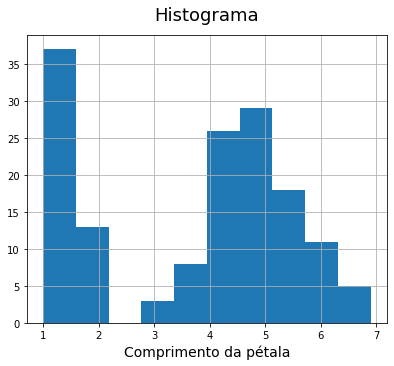

In [11]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])

ax.hist(df['comprimento_pétala'])
ax.set_title('Histograma', fontsize=18, pad=15)
ax.set_xlabel('Comprimento da pétala', fontsize=14)
ax.grid(True)
plt.show()

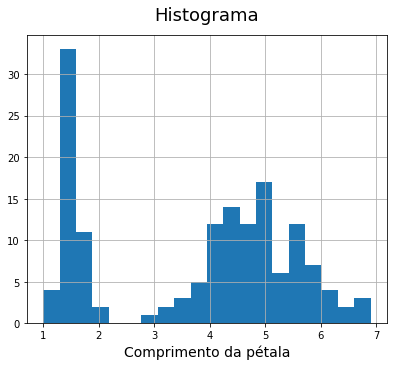

In [12]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])

ax.hist(df['comprimento_pétala'], bins=20)
ax.set_title('Histograma', fontsize=18, pad=15)
ax.set_xlabel('Comprimento da pétala', fontsize=14)
ax.grid(True)
plt.show()

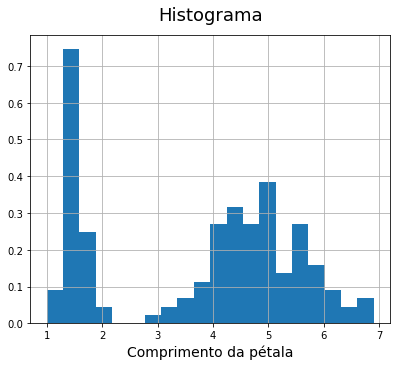

In [13]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])

ax.hist(df['comprimento_pétala'], bins=20, density=True)
ax.set_title('Histograma', fontsize=18, pad=15)
ax.set_xlabel('Comprimento da pétala', fontsize=14)
ax.grid(True)
plt.show()

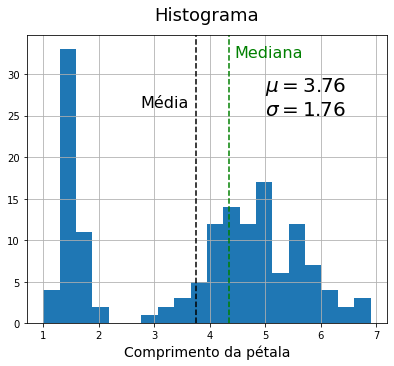

In [58]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])

mu, sigma, median = df['comprimento_pétala'].mean(), df['comprimento_pétala'].std(), df['comprimento_pétala'].median()

ax.hist(df['comprimento_pétala'], bins=20)
ax.set_title('Histograma', fontsize=18, pad=15)
ax.set_xlabel('Comprimento da pétala', fontsize=14)
ax.grid(True)

ax.annotate(f"$\mu = {mu:.2f}$ \n$\sigma = {sigma:.2f}$", xy=(5,25), fontsize=20)

ax.axvline(mu, linestyle='--', color='k')
ax.annotate('Média', xy=(mu-1, 26), fontsize=16)

ax.axvline(median, linestyle='--', color='g')
ax.annotate('Mediana', xy=(median+0.1, 32), fontsize=16, color='g')


plt.show()

In [61]:
df['espécie'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

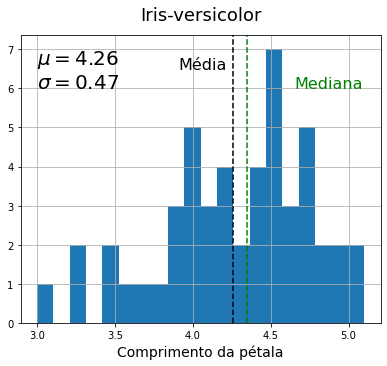

In [149]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])

df_iv = df[df['espécie'] == 'Iris-versicolor']

mu, sigma, median = (df_iv['comprimento_pétala'].mean(), df_iv['comprimento_pétala'].std(), 
                     df_iv['comprimento_pétala'].median())

ax.hist(df_iv['comprimento_pétala'], bins=20)
ax.set_title('Iris-versicolor', fontsize=18, pad=15)
ax.set_xlabel('Comprimento da pétala', fontsize=14)
ax.grid(True)

ax.annotate(f"$\mu = {mu:.2f}$ \n$\sigma = {sigma:.2f}$", xy=(3,6), fontsize=20)

ax.axvline(mu, linestyle='--', color='k')
ax.annotate('Média', xy=(mu-0.35, 6.5), fontsize=16)

ax.axvline(median, linestyle='--', color='g')
ax.annotate('Mediana', xy=(median+0.3, 6), fontsize=16, color='g')

plt.show()
fig.savefig('histograma-Iris-versicolor.png', bbox_inches='tight')

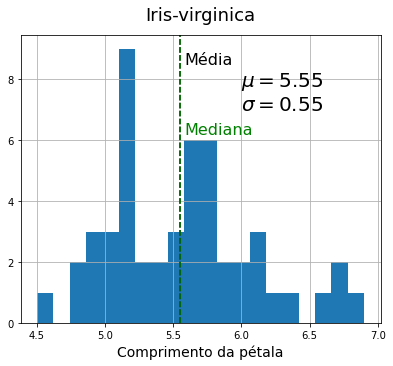

In [151]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])

df_iv = df[df['espécie'] == 'Iris-virginica']

mu, sigma, median = (df_iv['comprimento_pétala'].mean(), df_iv['comprimento_pétala'].std(), 
                     df_iv['comprimento_pétala'].median())

ax.hist(df_iv['comprimento_pétala'], bins=20)
ax.set_title('Iris-virginica', fontsize=18, pad=15)
ax.set_xlabel('Comprimento da pétala', fontsize=14)
ax.grid(True)

ax.annotate(f"$\mu = {mu:.2f}$ \n$\sigma = {sigma:.2f}$", xy=(6,7), fontsize=20)

ax.axvline(mu, linestyle='--', color='k')
ax.annotate('Média', xy=(mu+0.03, 8.5), fontsize=16)

ax.axvline(median, linestyle='--', color='g')
ax.annotate('Mediana', xy=(median+0.03, 6.2), fontsize=16, color='g')

plt.show()
fig.savefig('histograma-Iris-virginica.png', bbox_inches='tight')

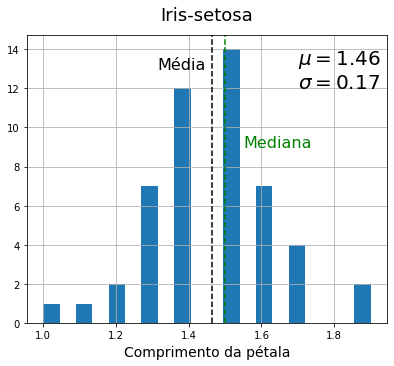

In [150]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])

df_iv = df[df['espécie'] == 'Iris-setosa']

mu, sigma, median = (df_iv['comprimento_pétala'].mean(), df_iv['comprimento_pétala'].std(), 
                     df_iv['comprimento_pétala'].median())

ax.hist(df_iv['comprimento_pétala'], bins=20)
ax.set_title('Iris-setosa', fontsize=18, pad=15)
ax.set_xlabel('Comprimento da pétala', fontsize=14)
ax.grid(True)

ax.annotate(f"$\mu = {mu:.2f}$ \n$\sigma = {sigma:.2f}$", xy=(1.7,12), fontsize=20)

ax.axvline(mu, linestyle='--', color='k')
ax.annotate('Média', xy=(mu-0.15, 13), fontsize=16)

ax.axvline(median, linestyle='--', color='g')
ax.annotate('Mediana', xy=(median+0.05, 9), fontsize=16, color='g')

plt.show()
fig.savefig('histograma-Iris-setosa.png', bbox_inches='tight')

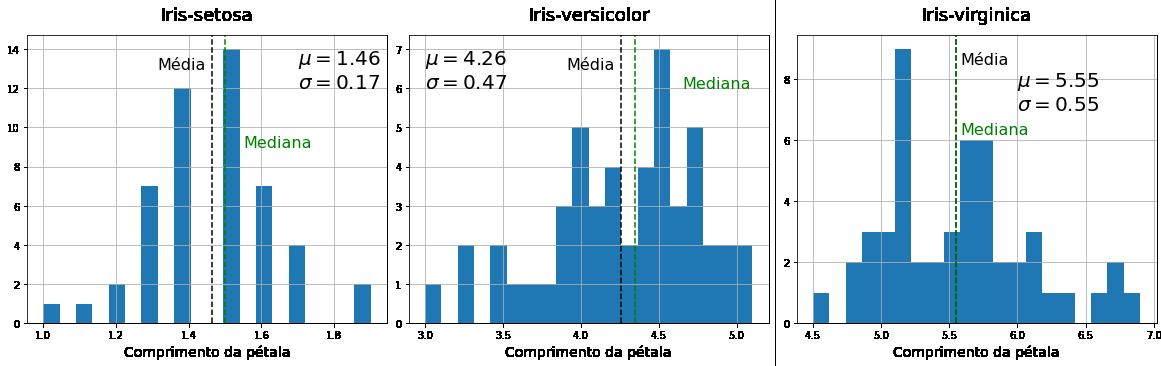

In [185]:
from PIL import Image

largura, altura = Image.open('histograma-Iris-versicolor.png').size
combinada = Image.new("RGB", (largura * 3, altura))
intervalo = 0

for image in map(Image.open, ['histograma-Iris-setosa.png', 'histograma-Iris-versicolor.png', 
                              'histograma-Iris-virginica.png']):
    combinada.paste(image, (intervalo,0))
    intervalo += largura+1

combinada.save('combinada.png')
combinada